In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfRetro = pd.read_csv('C:\\Users\\Sam\\Documents\\Data Mining\\Project\\retrosheet-events-plus-woba-2005_2015.csv')
altitudes = pd.read_excel("C:\\Users\\Sam\\Documents\\Data Mining\\Project\\Park_Factor\\Project_Code\\MLB_Stadium_Altitudes.xlsx")


In [3]:
dfRetro = dfRetro.drop(['time_since_1900', 'wOBA_pts', 'bat_hand_cd', 'base1_run_id', 'base2_run_id', 'base3_run_id','pitch_seq_tx','po1_fld_cd', 'po2_fld_cd','pit_start_fl', 'pa_ball_ct', 'pa_strike_ct', 'bat_fate_id', 'run1_fate_id', 'run2_fate_id', 'run3_fate_id', 'battedball_cd', 'inn_new_fl', 'inn_end_fl', 'pit_hand_cd'], axis=1)


In [4]:
#now drop any unnecessary events we don't need 
#stolen bases (4), caught stealing (6), pickoff (8), 
print(len(dfRetro))

dfRetro = dfRetro[dfRetro.event_cd != 4]
dfRetro = dfRetro[dfRetro.event_cd != 6]
dfRetro = dfRetro[dfRetro.event_cd != 8]


print(len(dfRetro))

2111526
2069898


In [5]:
events_with_altitudes = pd.merge(dfRetro, altitudes, on='home_team_id')


In [6]:
###Calculating runs per 9 here 
team_ids = []
for ii in dfRetro.home_team_id.unique():
    team_ids.append(ii)
total_runs = [[0 for i in range(2)] for j in range(30)] 
for i in range(0,30):
     total_runs[i][0] = team_ids[i]
for i in range(0,30):
    
    for j in range(0,len(events_with_altitudes)):
    
        if events_with_altitudes['home_team_id'][j] == total_runs[i][0]:
        
            total_runs[i][1] += events_with_altitudes['event_runs_ct'][j]

In [47]:
test = events_with_altitudes.drop_duplicates('game_id')
games_played = test.groupby('home_team_id').size()
#print(games_played)
innings_played = games_played * 9
#print(innings_played)

home_team_id
ANA    8019
ARI    8019
ATL    8019
BAL    8010
BOS    8019
CHA    8019
CHN    8010
CIN    8028
CLE    8001
COL    8019
DET    8019
FLO    5103
HOU    8010
KCA    8019
LAN    8019
MIA    2916
MIL    8019
MIN    8019
NYA    8019
NYN    8019
OAK    8019
PHI    8019
PIT    8019
SDN    8019
SEA    8028
SFN    8019
SLN    8010
TBA    8019
TEX    8019
TOR    8019
WAS    8001
dtype: int64


In [8]:
runs_per_9 = [[0 for i in range(2)] for j in range(30)] 
for i in range(0,30):
     runs_per_9[i][0] = team_ids[i]
#print(runs_per_9)

for i in range(len(total_runs)):
    runs_per_9[i][1] = ((total_runs[i][1] * 9)/innings_played[i])
print(runs_per_9)

[['ANA', 8.5634118967452295], ['ARI', 9.4287317620650946], ['ATL', 8.4017957351290686], ['BAL', 9.4966292134831463], ['BOS', 9.9955106621773293], ['CHA', 9.1683501683501678], ['CHN', 8.8977528089887645], ['CIN', 9.1647982062780269], ['CLE', 8.9133858267716537], ['COL', 10.888888888888889], ['DET', 9.3995510662177324], ['FLO', 9.2186948853615522], ['HOU', 8.5426966292134825], ['KCA', 9.1795735129068454], ['LAN', 8.0], ['MIL', 24.956790123456791], ['MIN', 8.9719416386083051], ['NYA', 9.6228956228956228], ['NYN', 8.1964085297418627], ['OAK', 8.3108866442199769], ['PHI', 9.1212121212121211], ['PIT', 8.4365881032547705], ['SDN', 7.4062850729517393], ['SEA', 7.9528619528619533], ['SFN', 7.8609865470852016], ['SLN', 8.4298540965207636], ['TBA', 8.5685393258426963], ['TEX', 10.095398428731762], ['TOR', 9.2154882154882163], ['WAS', 8.4208754208754204]]


In [50]:
per_9 = []
for ii in range(len(runs_per_9)):
    per_9.append(runs_per_9[ii][1])
print(per_9)

[8.5634118967452295, 9.4287317620650946, 8.4017957351290686, 9.4966292134831463, 9.9955106621773293, 9.1683501683501678, 8.8977528089887645, 9.1647982062780269, 8.9133858267716537, 10.888888888888889, 9.3995510662177324, 9.2186948853615522, 8.5426966292134825, 9.1795735129068454, 8.0, 24.956790123456791, 8.9719416386083051, 9.6228956228956228, 8.1964085297418627, 8.3108866442199769, 9.1212121212121211, 8.4365881032547705, 7.4062850729517393, 7.9528619528619533, 7.8609865470852016, 8.4298540965207636, 8.5685393258426963, 10.095398428731762, 9.2154882154882163, 8.4208754208754204]


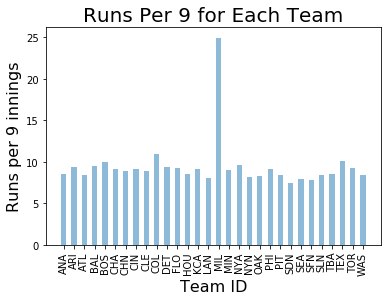

In [55]:
plt.title("Runs Per 9 for Each Team", size=20)
plt.xlabel("Team ID", size=16)
plt.ylabel("Runs per 9 innings", size=16)
y_pos = np.arange(len(runs_per_9))
plt.bar(y_pos, per_9, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, team_ids, rotation='vertical')
plt.figure(figsize=(50, 3))

plt.show()

In [28]:
print(runs_per_9[5][1])

9.16835016835


In [ ]:
temp_count = 0
for index, row in dfRetro.iterrows():
    if row['home_team_id'] == "MIL":
        temp_count+=1
print(temp_count)